In [14]:
import pandas as pd
df=pd.read_csv("hiring.csv")
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [18]:
df.experience=df["experience"].fillna("zero")
df["test_score(out of 10)"]=df["test_score(out of 10)"].interpolate()

In [19]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [20]:
import word2number.w2n as w2n

In [21]:
df["experience"]=df["experience"].apply(w2n.word_to_num)

In [22]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [24]:
x=df.drop(["salary($)"],axis=1)
y=df["salary($)"]

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [25]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [27]:
reg.fit(x_train,y_train)

LinearRegression()

In [28]:
reg.predict(x_test)

array([59382.88440334, 79017.2596143 ])

In [29]:
y_test

5    62000
7    80000
Name: salary($), dtype: int64

In [30]:
reg.score(x_test,y_test)

0.9517588104199721

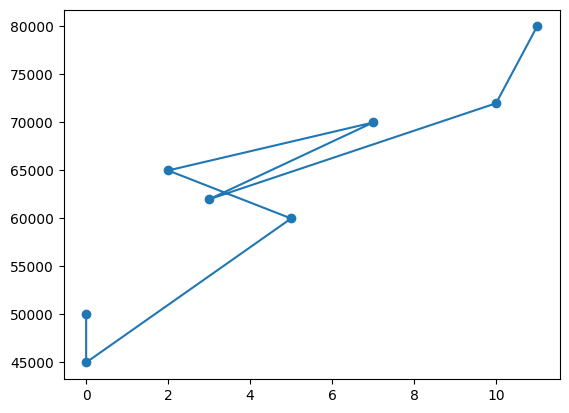

In [33]:
import matplotlib.pyplot as plt
plt.scatter(df["experience"],y)
plt.plot(df["experience"],y)